In [57]:
from scipy.optimize import linprog
import numpy as np

ми граємо в економічну гру

наша мета заробити золоті монети на продажі товарів, обмежуємось двама товарами, Міфрилом та Оріхалкумом

Наші обмеження, ми маємо лише 100 золотих монет, ми маємо сумку на 20 слотів

Вартість Міфриму = 5 золотих і він займає 0.5 і ми можемо його продати за 5.5 золотих
Вартість Оріхалкуму = 7 золотих і він займає 1 і продати за 9

кількість товару має бути більшої за 0

In [58]:
price_m = 4.9
price_o = 7.8

sell_m = 5.5
sell_o = 9

space_m = 0.5
space_o = 1

budget = 80
space = 15

In [59]:
# m - кількість міфрил
# o - кількість оріхалкуму

# Цільова функція
# max m * Заробіток від міфриму + o * заробіток від оріхалкуму
c = np.array([
    [sell_m - price_m, sell_o - price_o] # цільова функція
])

# Формулюємо умови
# m * Варітсть + o * Вартість <= 50
# m * Місце в сумці + o * Місце в сумці <= 20
A = (
    [price_m, price_o], # умова вартості
    [space_m, space_o] # умова містксті
)
# рядок результатів умов
b = np.array([[budget], [space]])

# Записуємо вектор обмежень області значень
bnd = [(0, None), (0, None)]

# Знаходимо розвязки задачі
res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)

print(res)
if res.success:
    m, o = res.x
    print(f"Потрібно закупити Міфрилу: {m} Оріхалкуму: {o}")

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -12.30769230769231
              x: [ 0.000e+00  1.026e+01]
            nit: 2
          lower:  residual: [ 0.000e+00  1.026e+01]
                 marginals: [ 1.538e-01  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  4.744e+00]
                 marginals: [-1.538e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
Потрібно закупити Міфрилу: 0.0 Оріхалкуму: 10.256410256410257


/var/folders/y9/8hfztb_95593247qz6t69wyw0000gp/T/ipykernel_74084/2815097648.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


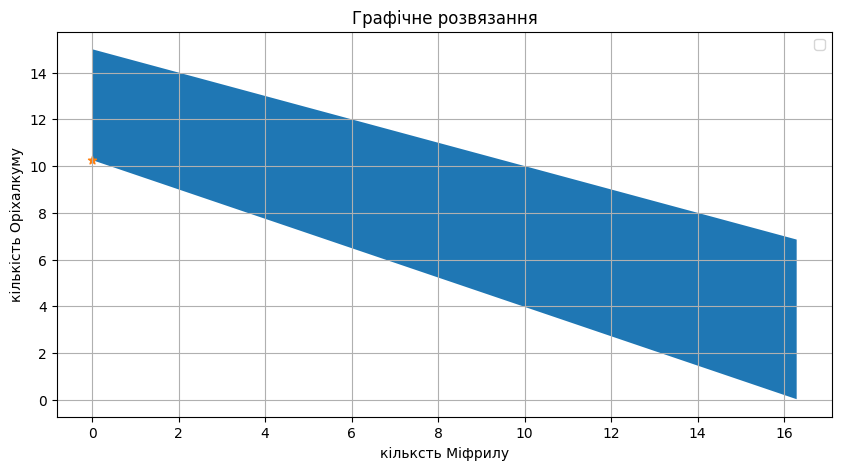

In [60]:
import matplotlib.pyplot as plt

# x - координати де відкладаються кількість Міфрилу
# y - координати де відкладаються Оріхалкум

plt.figure(figsize=(10, 5))
x = np.linspace(0, 30, 500)
# x * Варітсть + y * Вартість <= 100
# x * Місце в сумці + y * Місце в сумці <= 20
y1 = (budget - x * price_m) / price_o
y2 = (space - x * space_m) / space_o

plt.fill_between(x, y1, y2, where=(y1>=0)&(y2>=0))
plt.scatter(m, o, marker="*")
#plt.plot(range(1, 31), iron_accumulation, label='Iron Ore', color='gray')

plt.xlabel('кільксть Міфрилу')
plt.ylabel('кількість Оріхалкуму')
plt.title('Графічне розвязання')
plt.grid()
plt.legend()
plt.show()



Добавимо треьій товар яким хочемо торгувати

Золото, Вартість = 1, продати можна за 1.5, займає 0.1 місця в сумці

In [65]:
price_g = 1
sell_g = 1.2
space_g = 0.1 

In [67]:
c = np.array([
    [sell_m - price_m, 
     sell_o - price_o,
     sell_g - price_g
     ] # цільова функція
])

# Формулюємо умови
# m * Варітсть + o * Вартість + g * Вартість <= 50
# m * Місце в сумці + o * Місце в сумці + g * Місце в сумці <= 20
A = (
    [price_m, price_o, price_g], # умова вартості
    [space_m, space_o, space_g] # умова містксті
)
# рядок результатів умов
b = np.array([[budget], [space]])

# Записуємо вектор обмежень області значень
bnd = [(0, None), (0, None), (0, None)]

# Знаходимо розвязки задачі
res = linprog(-c, A_ub=A, b_ub=b, bounds=bnd)

if res.success:
    m, o, g = res.x
    print(f"Потрібно закупити Міфрилу: {m} Оріхалкуму: {o} Золота: {g}")
    print(f"Ми отримаємо максимальний прибуток у розмірі: {-res.fun}")

Потрібно закупити Міфрилу: 0.0 Оріхалкуму: 0.0 Золота: 80.0
Ми отримаємо максимальний прибуток у розмірі: 15.999999999999996


In [69]:
80 * 0.2

16.0